In [ ]:
from main import SimCatVal
import numpy as np
from utils import sample_position, sample_diff_position
import pickle

ind = 35
skycat_path="/hildafs/home/pladuca/main/skyCatalog.yaml"
Dp1_sample="/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/ECDFS_1000_psf_e12.pkl"
im_size=500
save_path="/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff"

with open(Dp1_sample, 'rb') as f:
    rsp_sample = pickle.load(f)

position = sample_position(ind, 17)
ra = position[ind-1][0]
dec = position[ind-1][1]
sample = rsp_sample[ind-1].copy()
sample.pop('ra')
sample.pop('dec')

diff_position = sample_diff_position(ind+1, 17)
diff_ra = diff_position[ind-1][0]
diff_dec = diff_position[ind-1][1]
samp = {'i':sample['i']}
# afw_dic, truths, ims, area = SimCatVal(skycat_path,ra,dec,im_size,50,samp,31.4,ind,save_path,)#'diffsky_1deg.pickle',diff_ra,diff_dec)
afw_dic_, npy_dic_, cats_, truths_, area_ = SimCatVal(skycat_path,ra,dec,im_size,50,samp,31.4,ind,save_path,'diffsky_1deg_245_54.pickle',diff_ra,diff_dec)


2026-01-23 12:00:17,194 - INFO - Catalog data will be read from /hildafs/home/pladuca/main/roman_rubin_cats_v1.1.2_faint/roman_rubin_cats_v1.1.2_faint/


Generating Sims


2026-01-23 12:00:18,278 - INFO - Working on healpix pixel 10307
2026-01-23 12:00:21,595 - WARNING - In SkyCatalog.get_object_type_by_hp, healpix 10431  intersects region but has no data file for diffsky_galaxy
2026-01-23 12:00:21,596 - INFO - Working on healpix pixel 10307
2026-01-23 12:00:21,633 - WARNING - In SkyCatalog.get_object_type_by_hp, healpix 10431  intersects region but has no data file for star


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff/run_20260123T1201_36
Running Pipeline


  0%|          | 0/1 [00:00<?, ?it/s]

Too few points in grid to constrain fit: min(nx, ny) < approxOrder) [min(4, 4) < 6]
Reducing approxOrder to 3


Done!


In [ ]:
# import lsst.afw.image as afwImage
# import lsst.afw.math as afwMath
# from lsst.meas.algorithms import KernelPsf
# from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask
# from lsst.meas.algorithms.detection import SourceDetectionTask
# from lsst.meas.algorithms.subtractBackground import SubtractBackgroundTask
# from lsst.meas.deblender import SourceDeblendTask
# from lsst.meas.base import SingleFrameMeasurementTask
# from lsst.meas.algorithms import GaussianPsfFactory as psffac
# import lsst.meas.extensions.gaap
# import lsst.meas.modelfit
# import lsst.geom as geom
# from lsst.geom import Point2D
# from lsst.afw.geom import makeSkyWcs
# from lsst.afw.table import SourceTable
# import galsim
# import coord
# import numpy as np

# def run_lsst_pipe_single(exp, deblend=True):

#     configDetection = SourceDetectionTask.ConfigClass()
#     # configDetection.thresholdValue = 5
#     # # configDetection.doTempLocalBackground = False
#     # configDetection.reEstimateBackground = False

#     # # configDetection.thresholdType = "stdev"  # units for thresholdValue
#     # # configDetection.nSigmaToGrow = 1.0
#     # configDetection.nSigmaForKernel = 7
#     # configDetection.minPixels = 1
    
#     if deblend:
#         configDeblend = SourceDeblendTask.ConfigClass()
#     configMeasurement = SingleFrameMeasurementTask.ConfigClass()
#     configMeasurement.plugins.names |= [
#         "modelfit_DoubleShapeletPsfApprox",
#         "modelfit_CModel",
#         "ext_gaap_GaapFlux",
#     ]
#     configMeasurement.slots.modelFlux = "modelfit_CModel"

#     schema = SourceTable.makeMinimalSchema()
#     raerr = schema.addField("coord_raErr", type="F")
#     decerr = schema.addField("coord_decErr", type="F")

#     detect = SourceDetectionTask(schema=schema, config=configDetection)
#     if deblend:
#         deblender = SourceDeblendTask(schema=schema, config=configDeblend)
#     #background = SubtractBackgroundTask() ?
#     measure = SingleFrameMeasurementTask(schema=schema, config=configMeasurement)

#     table = SourceTable.make(schema)
#     detect_result = detect.run(table=table, exposure=exp)
#     detected_catalog = detect_result.sources
#     if deblend:
#         deblender.run(exp, detected_catalog)
#     measure.run(measCat=detected_catalog, exposure=exp)
#     detected_catalog = detected_catalog.copy(True)

#     # if deblend:
#     #     return detected_catalog.asAstropy()[COLUMNS+['deblend_nChild']]  
#     return detected_catalog.asAstropy()


In [ ]:
# cat_i = run_lsst_pipe_single(afw_dic['i'])
# cat_i_ = run_lsst_pipe_single(afw_dic_['i'])

In [70]:
import pickle
import numpy as np
run_path = '/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff/run_diff_3000_i'
with open(f'{run_path}/ECDFS_sim_im.pkl', 'rb') as f:
    npy_dic_ = pickle.load(f)
with open(f'{run_path}/ECDFS_sim_meas_single.pkl', 'rb') as f:
    cats_ = pickle.load(f)
with open(f'{run_path}/ECDFS_sim_truth.pkl', 'rb') as f:
    truths_ = pickle.load(f)

run_path = '/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff/run_sim_3000_i'
with open(f'{run_path}/ECDFS_sim_im.pkl', 'rb') as f:
    npy_dic = pickle.load(f)
with open(f'{run_path}/ECDFS_sim_meas_single.pkl', 'rb') as f:
    cats = pickle.load(f)
with open(f'{run_path}/ECDFS_sim_truth.pkl', 'rb') as f:
    truths = pickle.load(f)

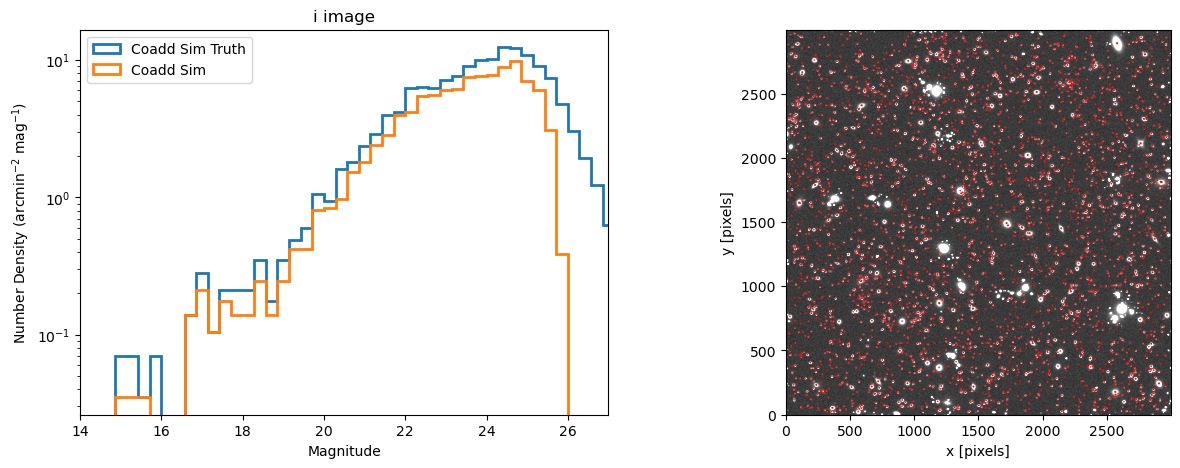

In [71]:
from matplotlib.patches import Ellipse
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize, AsinhStretch
import matplotlib.pyplot as plt

def make_some_plots(band, afw_img, cat, truth):
    cat = cat[(cat['deblend_nChild'] == 0) &
              (cat['base_SdssShape_flag'] == False) &
              (cat['modelfit_CModel_instFlux'] >= 0) &
              (cat['modelfit_CModel_flag'] == False) &
              (cat['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
              (cat['base_SdssCentroid_flag'] == False) &
              (cat['ext_gaap_GaapFlux_flag'] == False) &
              (cat['base_ClassificationSizeExtendedness_flag'] == False)]
    mag = -2.5 * np.log10(cat['modelfit_CModel_instFlux']) + 31.4
    size = np.sqrt(cat['base_SdssShape_xx'] + cat['base_SdssShape_yy'])
    snr = (cat['base_PsfFlux_instFlux']/cat['base_PsfFlux_instFluxErr'] >= 10)
    tmag = -2.5 * np.log10(truth[band]['flux']) + 31.4

    mag_bins = np.linspace(14, 28, 50)
    bin_size = mag_bins[1] - mag_bins[0]

    fig, ax = plt.subplots(1,2,figsize=(15,5))

    mag_weight = np.full_like(mag[snr], 1/((3000 * 0.2 /60)**2 *bin_size))
    tmag_weight = np.full_like(tmag, 1/((3000 * 0.2 /60)**2*bin_size))

    # ax[0].hist(dp1_m, dp1_b,weights=dp1_w,histtype="step",linewidth=2, label="Dp1")
    ax[0].hist(tmag, mag_bins,weights=tmag_weight,histtype="step",linewidth=2,label="Coadd Sim Truth")
    ax[0].hist(mag[snr], mag_bins,weights=mag_weight,histtype="step",linewidth=2,label="Coadd Sim")

    ax[0].set_xlabel("Magnitude")
    ax[0].set_ylabel("Number Density (arcmin$^{-2}$ mag$^{-1}$)")
    if band == 'u':
        ax[0].set_xlim(14,25)
        # ax[0].set_ylim(0,15)
    else:
        ax[0].set_xlim(14,27)
        # ax[0].set_ylim(0,30)
    ax[0].set_yscale('log')

    ax[1].imshow(afw_img['image'], origin='lower', cmap='gray', vmin=-3,vmax=10)
    # ax[1].set_xlim(0,1000)
    # ax[1].set_ylim(0,1000)
    for i in range(len(cat)):
        x = cat['base_SdssCentroid_x'][i]
        y = cat['base_SdssCentroid_y'][i]
        xx = cat['base_SdssShape_xx'][i]
        yy = cat['base_SdssShape_yy'][i]
        xy = cat['base_SdssShape_xy'][i]

        T = 0.5 * (xx + yy)
        D = np.sqrt(((xx - yy) / 2)**2 + xy**2)
        a = np.sqrt(T + D)
        b = np.sqrt(T - D)
        theta = 0.5 * np.arctan2(2 * xy, xx - yy)
        
        e = Ellipse((x, y), width=2*a, height=2*b,
                    angle=np.degrees(theta), edgecolor='red',
                    facecolor='none', lw=0.8)
        ax[1].add_patch(e)
    ax[1].set_xlabel('x [pixels]')
    ax[1].set_ylabel('y [pixels]')
    ax[0].set_title(f'{band} image')
    ax[0].legend()
    plt.show()

    
# bands = 'ugirzy'
bands = 'i'
for b in bands:
    make_some_plots(b, npy_dic_[b], cats_[b], truths_)#cat[b][cat[b]['modelfit_CModel_instFlux']/cat[b]['modelfit_CModel_instFluxErr'] > 0], truths)

#need to figure out how to account for area of the image if some images are partially off of the sim catalog region

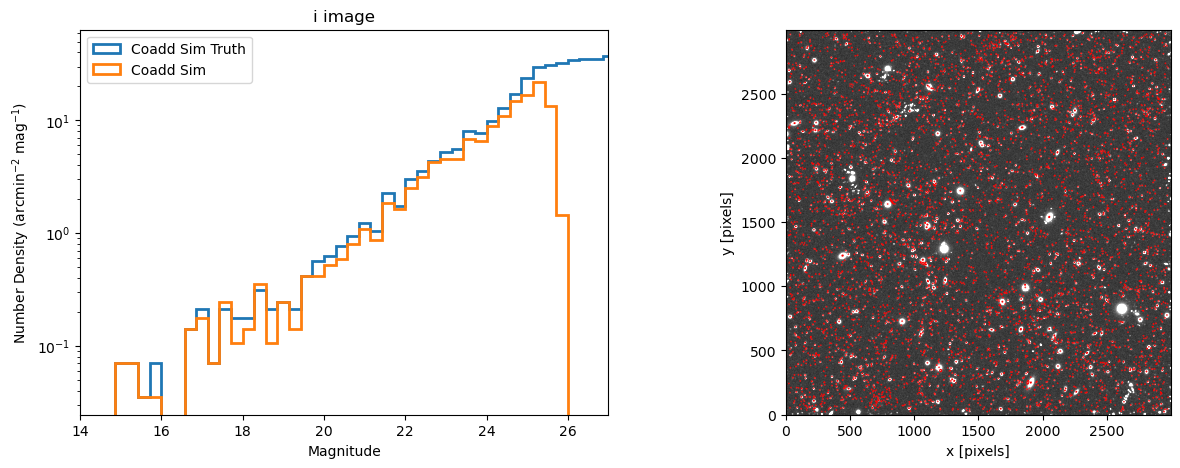

In [17]:
bands = 'i'
for b in bands:
    make_some_plots(b, npy_dic[b], cats[b], truths)

(13.0, 28.0)

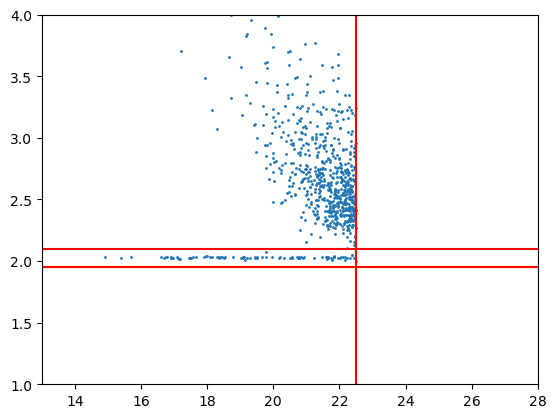

In [72]:
def cuts(cat):
    cat = cat[(cat['deblend_nChild'] == 0) &
              (cat['base_SdssShape_flag'] == False) &
              (cat['modelfit_CModel_instFlux'] >= 0) &
              (cat['modelfit_CModel_flag'] == False) &
              (cat['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
              (cat['base_SdssCentroid_flag'] == False) &
              (cat['ext_gaap_GaapFlux_flag'] == False) &
              (cat['base_ClassificationSizeExtendedness_flag'] == False)]
    snr = (cat['base_PsfFlux_instFlux']/cat['base_PsfFlux_instFluxErr'] >= 10) & ((-2.5 * np.log10(cat['modelfit_CModel_instFlux']) + 31.4)<=22.5)
    return cat[snr]

cut_i_ = cuts(cats_['i'])

mag = -2.5 * np.log10(cut_i_['modelfit_CModel_instFlux']) + 31.4
size = (cut_i_['base_SdssShape_xx']*cut_i_['base_SdssShape_yy'] - cut_i_['base_SdssShape_xy']**2)**0.25

plt.scatter(mag, size, s=1, alpha=1)
up = 2.1
down = 1.95
cut = 22.5

plt.axhline(up, c='r')
plt.axhline(down, c='r')
plt.axvline(cut, c='r')
stars_ = cut_i_[(mag < cut) & (size < up) & (size > down)]
gals_ = cut_i_[(size >= up)]

plt.ylim(1,4)
plt.xlim(13,28)

    

(13.0, 28.0)

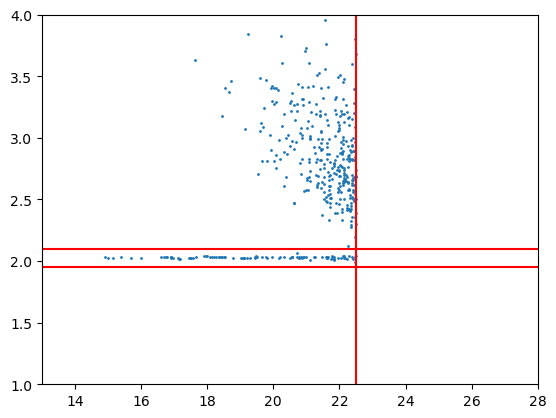

In [73]:
cut_i = cuts(cats['i'])

mag = -2.5 * np.log10(cut_i['modelfit_CModel_instFlux']) + 31.4
size = (cut_i['base_SdssShape_xx']*cut_i['base_SdssShape_yy'] - cut_i['base_SdssShape_xy']**2)**0.25

plt.scatter(mag, size, s=1, alpha=1)
up = 2.1
down = 1.95
cut = 22.5

plt.axhline(up, c='r')
plt.axhline(down, c='r')
plt.axvline(cut, c='r')
stars = cut_i[(mag < cut) & (size < up) & (size > down)]
gals = cut_i[(size >= up)]

plt.ylim(1,4)
plt.xlim(13,28)

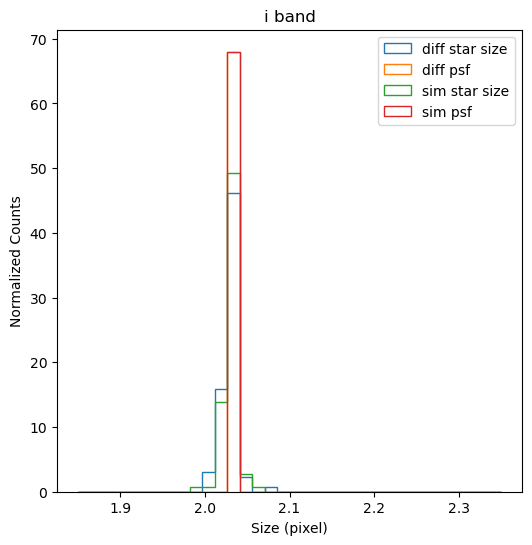

In [74]:
size_bins = np.linspace(1.85,2.35,35)
bin_size = size_bins[1] - size_bins[0]
# star_trace = np.sqrt(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
# star_psf_trace = np.sqrt(stars['base_SdssShape_psf_xx'] + stars['base_SdssShape_psf_yy'])
star_size = (stars['base_SdssShape_xx']*stars['base_SdssShape_yy'] - stars['base_SdssShape_xy']**2)**0.25
star_psf = (stars['base_SdssShape_psf_xx']*stars['base_SdssShape_psf_yy'] - stars['base_SdssShape_psf_xy']**2)**0.25
star_size_ = (stars_['base_SdssShape_xx']*stars_['base_SdssShape_yy'] - stars_['base_SdssShape_xy']**2)**0.25
star_psf_ = (stars_['base_SdssShape_psf_xx']*stars_['base_SdssShape_psf_yy'] - stars_['base_SdssShape_psf_xy']**2)**0.25
#test the size using the trace while using the detRad for the star selection

sim_weight = np.full_like(star_size, 1/((im_size * 0.2 /60)**2*bin_size))
dp1_weight = np.full_like(star_size_, 1/((im_size * 0.2 /60)**2*bin_size))

fig, ax = plt.subplots(figsize=(6,6))
# plt.hist(dp1_size[dp1_star], size_bins,weights=dp1_weight, histtype="step", label="dp1 star size")
# plt.hist(dp1_size_psf[dp1_star], size_bins,weights=dp1_weight, histtype="step", label="dp1 psf")
# plt.hist(star_size, size_bins,weights=sim_weight, histtype="step", label="sim star size")
# plt.hist(star_psf, size_bins,weights=sim_weight, histtype="step", label="sim psf")
plt.hist(star_size_,size_bins,density=True, histtype="step", label="diff star size")
plt.hist(star_psf_,size_bins,density=True, histtype="step", label="diff psf")
plt.hist(star_size, size_bins,density=True, histtype="step", label="sim star size")
plt.hist(star_psf, size_bins,density=True, histtype="step", label="sim psf")
plt.xlabel('Size (pixel)')
plt.ylabel('Normalized Counts')
plt.title(f'{b} band')
plt.legend()
# plt.grid()
plt.show()

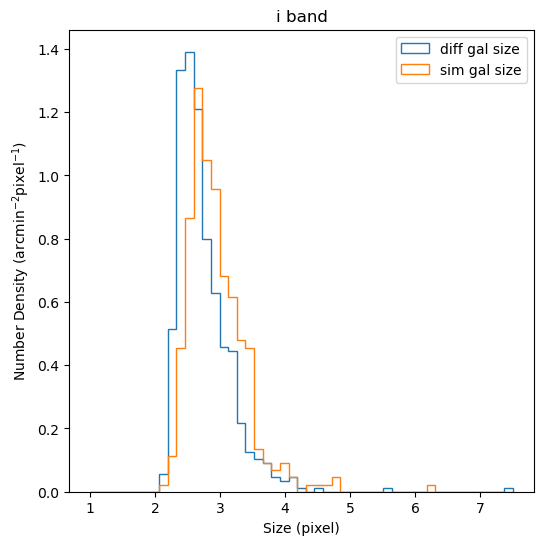

In [75]:
size_bins = np.linspace(1,7.5,50)
gal_size = (gals['base_SdssShape_xx']*gals['base_SdssShape_yy'] - gals['base_SdssShape_xy']**2)**0.25
gal_size_ = (gals_['base_SdssShape_xx']*gals_['base_SdssShape_yy'] - gals_['base_SdssShape_xy']**2)**0.25

bin_size = size_bins[1] - size_bins[0]
sim_weight = np.full_like(gal_size, 1/((im_size * 0.2 /60)**2*bin_size))
dp1_weight = np.full_like(gal_size_, 1/((im_size * 0.2 /60)**2*bin_size))

fig, ax = plt.subplots(figsize=(6,6))
# plt.hist(dp1_trace[dp1_mask], size_bins, weights=dp1_weight, histtype="step", label="dp1 gal size")
# plt.hist(gal_size, size_bins, weights=sim_weight, histtype="step", label="sim gal size")
plt.hist(gal_size_, size_bins, density=True, histtype="step", label="diff gal size")
plt.hist(gal_size, size_bins, density=True, histtype="step", label="sim gal size")
plt.xlabel('Size (pixel)')
plt.ylabel('Number Density (arcmin$^{-2} $pixel$^{-1}$)')
plt.legend()
plt.title(f'{b} band')
# plt.grid()
# plt.yscale('log')
plt.show()

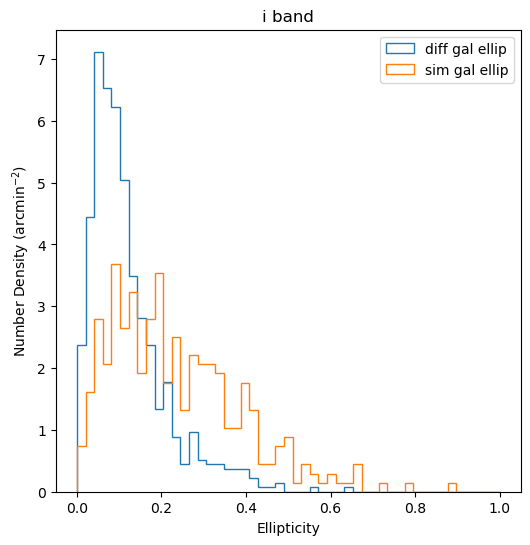

In [76]:
e1 = (gals['base_SdssShape_xx'] - gals['base_SdssShape_yy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
e2 = 2*(gals['base_SdssShape_xy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
ellip = np.sqrt((e1)**2 + (e2)**2)

e1_ = (gals_['base_SdssShape_xx'] - gals_['base_SdssShape_yy'])/(gals_['base_SdssShape_xx'] + gals_['base_SdssShape_yy'])
e2_ = 2*(gals_['base_SdssShape_xy'])/(gals_['base_SdssShape_xx'] + gals_['base_SdssShape_yy'])
ellip_ = np.sqrt((e1_)**2 + (e2_)**2)

ellip_bins = np.linspace(0,1,50)
bin_size = ellip_bins[1] - ellip_bins[0]
sim_weight = np.full_like(ellip, 1/((im_size * 0.2 /60)**2*bin_size))
dp1_weight = np.full_like(ellip_, 1/((im_size * 0.2 /60)**2*bin_size))

fig, ax = plt.subplots(figsize=(6,6))
# plt.hist(dsellip[dp1_mask], ellip_bins, weights=dp1_weight, histtype="step", label="dp1 gal ellip")
# plt.hist(ellip, ellip_bins, weights=sim_weight, histtype="step", label="sim gal ellip")
plt.hist(ellip_, ellip_bins, density=True, histtype="step", label="diff gal ellip")
plt.hist(ellip, ellip_bins, density=True, histtype="step", label="sim gal ellip")

plt.xlabel('Ellipticity')
plt.ylabel('Number Density (arcmin$^{-2}$)')
plt.legend()
plt.title(f'{b} band')
# plt.grid()
# plt.yscale('log')
plt.show()

/tmp/ipykernel_2545225/3798473225.py:17: RuntimeWarning: divide by zero encountered in divide
  diff_frac = diff / ghist_dp1
/tmp/ipykernel_2545225/3798473225.py:17: RuntimeWarning: invalid value encountered in divide
  diff_frac = diff / ghist_dp1


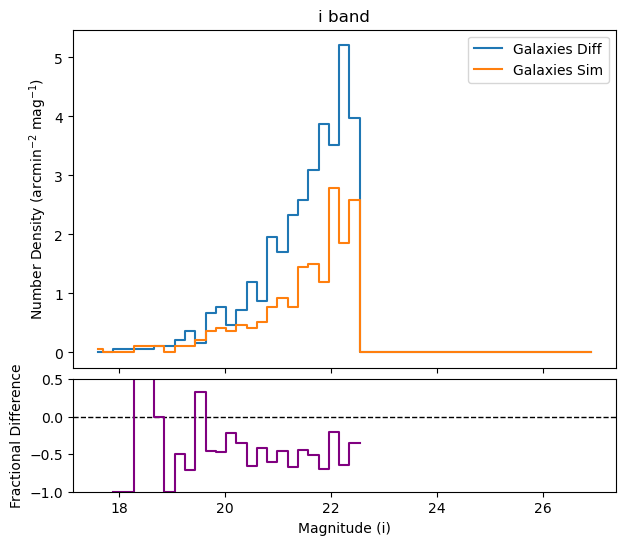

In [77]:
mag_bins = np.linspace(17.5, 27, 50)
bin_centers = 0.5 * (mag_bins[1:] + mag_bins[:-1])
bin_size = mag_bins[1] - mag_bins[0]

gal_mag = -2.5 * np.log10(gals['modelfit_CModel_instFlux']) + 31.4
gal_mag_ = -2.5 * np.log10(gals_['modelfit_CModel_instFlux']) + 31.4

sim_weight = np.full_like(gal_mag, 1/((3000*0.2/60)**2*bin_size))
sim_weight_ = np.full_like(gal_mag_, 1/((3000*0.2/60)**2*bin_size))

# Compute histograms (number density)
ghist_dp1, _ = np.histogram(gal_mag_, bins=mag_bins, weights=sim_weight_ )
ghist_sim, _ = np.histogram(gal_mag, bins=mag_bins, weights=sim_weight )

# Difference
diff = ghist_sim - ghist_dp1
diff_frac = diff / ghist_dp1

# Figure with two panels
fig, (ax_top, ax_bot) = plt.subplots(
    2, 1,
    figsize=(7, 6),
    sharex=True,
    gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05}
)

# --- Top panel: histograms ---
ax_top.step(bin_centers, ghist_dp1, where="mid", label="Galaxies Diff")
ax_top.step(bin_centers, ghist_sim, where="mid", label="Galaxies Sim")
# ax_top.set_yscale("log")
ax_top.set_ylabel("Number Density (arcmin$^{-2}$ mag$^{-1}$)")
ax_top.legend()
ax_top.set_title(f"{b} band")

# --- Bottom panel: difference ---
ax_bot.axhline(0, color="k", lw=1, ls="--")
# ax_bot.axhline(0.1, color="k", lw=1, ls="--")
# ax_bot.axhline(-0.1, color="k", lw=1, ls="--")
ax_bot.step(bin_centers, diff_frac, where="mid", color="purple")
ax_bot.set_xlabel(f"Magnitude ({b})")
ax_bot.set_ylabel("Fractional Difference")
ax_bot.set_ylim(-1,0.5)

plt.show()

Text(0, 0.5, 'Galaxy Size (pixels)')

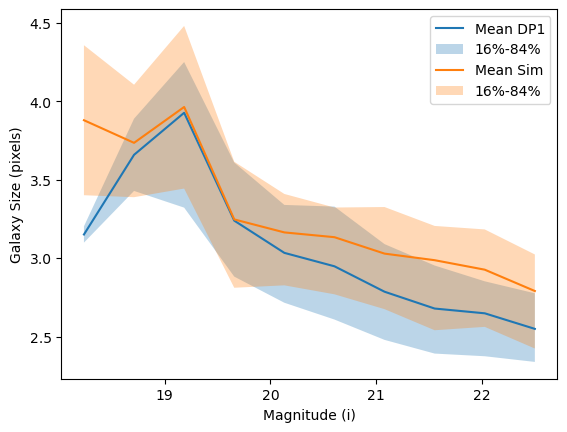

In [106]:
def percent_bins(x, y, bins):
    indices = np.digitize(x, bins)
    bin_centers = []
    y_means = []
    y_stds = []
    for i in range(1, len(bins)):
        mask = indices == i
        if np.sum(mask) > 0:
            bin_center = 0.5 * (bins[i-1] + bins[i])
            bin_centers.append(bin_center)
            y_means.append(np.mean(y[mask]))
            y_stds.append((np.percentile(y[mask], 16), np.percentile(y[mask], 84)))
        else:
            continue
    bin_centers = np.array(bin_centers)
    y_means = np.array(y_means)
    y_stds = np.array(y_stds)
    return bin_centers, y_means, y_stds

x, y, percents = percent_bins(gal_mag_,gal_size_,np.linspace(18, 27, 20))
plt.plot(x, y, label='Mean DP1')
plt.fill_between(x, percents[:,0], percents[:,1], alpha=0.3, label='16%-84%')
x, y, percents = percent_bins(gal_mag,gal_size,np.linspace(18, 27, 20))
plt.plot(x, y, label='Mean Sim')
plt.fill_between(x, percents[:,0], percents[:,1], alpha=0.3, label='16%-84%')
plt.legend()
plt.xlabel("Magnitude (i)")
plt.ylabel("Galaxy Size (pixels)")

Text(0, 0.5, 'Galaxy Size (pixels)')

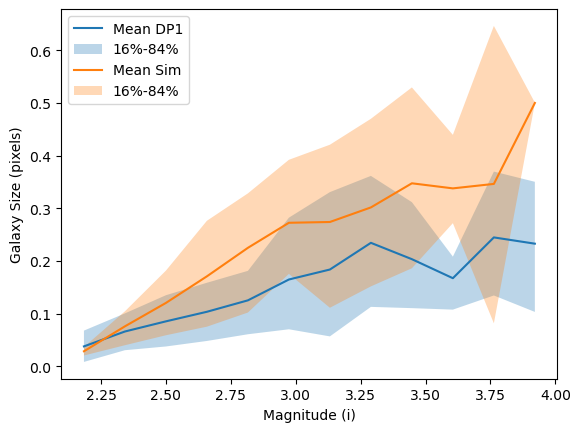

In [107]:
def percent_bins(x, y, bins):
    indices = np.digitize(x, bins)
    bin_centers = []
    y_means = []
    y_stds = []
    for i in range(1, len(bins)):
        mask = indices == i
        if np.sum(mask) > 1:
            bin_center = 0.5 * (bins[i-1] + bins[i])
            bin_centers.append(bin_center)
            y_means.append(np.mean(y[mask]))
            y_stds.append((np.percentile(y[mask], 16), np.percentile(y[mask], 84)))
        else:
            continue
    bin_centers = np.array(bin_centers)
    y_means = np.array(y_means)
    y_stds = np.array(y_stds)
    return bin_centers, y_means, y_stds

x, y, percents = percent_bins(gal_size_,ellip_,np.linspace(1, 4, 20))
plt.plot(x, y, label='Mean DP1')
plt.fill_between(x, percents[:,0], percents[:,1], alpha=0.3, label='16%-84%')
x, y, percents = percent_bins(gal_size,ellip,np.linspace(1, 4, 20))
plt.plot(x, y, label='Mean Sim')
plt.fill_between(x, percents[:,0], percents[:,1], alpha=0.3, label='16%-84%')
plt.legend()
plt.xlabel("Magnitude (i)")
plt.ylabel("Galaxy Size (pixels)")